In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
import requests

url = "https://iex.lewagon.com/stable/stock/aapl/chart/3m"
api_data = requests.get(url).json()


In [4]:
apple_df = pd.DataFrame(api_data)

In [5]:
apple_df.head()

,close,high,low,open,symbol,volume,id,key,subkey,date,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,174.07,174.14,170.21,171.06,AAPL,90131418,HISTORICAL_PRICES,AAPL,,2022-03-24,...,170.21,90131418,170.8090,173.8146,173.8845,169.9603,90131418,"Mar 24, 22",0.00,0.0000
1,174.72,175.28,172.75,173.88,AAPL,80546156,HISTORICAL_PRICES,AAPL,,2022-03-25,...,172.75,80546156,173.6249,174.4637,175.0228,172.4966,80546156,"Mar 25, 22",0.65,0.0037
2,175.60,175.73,172.00,172.17,AAPL,90371916,HISTORICAL_PRICES,AAPL,,2022-03-28,...,172.00,90371916,171.9174,175.3424,175.4722,171.7477,90371916,"Mar 28, 22",0.88,0.0050
3,178.96,179.01,176.34,176.69,AAPL,100589440,HISTORICAL_PRICES,AAPL,,2022-03-29,...,176.34,100589440,176.4308,178.6974,178.7474,176.0813,100589440,"Mar 29, 22",3.36,0.0191
4,177.77,179.61,176.70,178.55,AAPL,92633154,HISTORICAL_PRICES,AAPL,,2022-03-30,...,176.70,92633154,178.2880,177.5092,179.3465,176.4408,92633154,"Mar 30, 22",-1.19,-0.0066


In [12]:
apple_df['date'] = pd.to_datetime(apple_df['date'])

In [13]:
apple_df.head(3)

,close,high,low,open,symbol,volume,id,key,subkey,date,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,174.07,174.14,170.21,171.06,AAPL,90131418,HISTORICAL_PRICES,AAPL,,2022-03-24,...,170.21,90131418,170.8090,173.8146,173.8845,169.9603,90131418,"Mar 24, 22",0.00,0.0000
1,174.72,175.28,172.75,173.88,AAPL,80546156,HISTORICAL_PRICES,AAPL,,2022-03-25,...,172.75,80546156,173.6249,174.4637,175.0228,172.4966,80546156,"Mar 25, 22",0.65,0.0037
2,175.60,175.73,172.00,172.17,AAPL,90371916,HISTORICAL_PRICES,AAPL,,2022-03-28,...,172.00,90371916,171.9174,175.3424,175.4722,171.7477,90371916,"Mar 28, 22",0.88,0.0050


In [14]:
apple_df.set_index('date', inplace=True)
apple_df.head(3)

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2022-03-24,174.07,174.14,170.21,171.06,AAPL,90131418,HISTORICAL_PRICES,AAPL,,1.652532e+12,...,170.21,90131418,170.8090,173.8146,173.8845,169.9603,90131418,"Mar 24, 22",0.00,0.0000
2022-03-25,174.72,175.28,172.75,173.88,AAPL,80546156,HISTORICAL_PRICES,AAPL,,1.652532e+12,...,172.75,80546156,173.6249,174.4637,175.0228,172.4966,80546156,"Mar 25, 22",0.65,0.0037
2022-03-28,175.60,175.73,172.00,172.17,AAPL,90371916,HISTORICAL_PRICES,AAPL,,1.652532e+12,...,172.00,90371916,171.9174,175.3424,175.4722,171.7477,90371916,"Mar 28, 22",0.88,0.0050


<AxesSubplot:xlabel='date'>

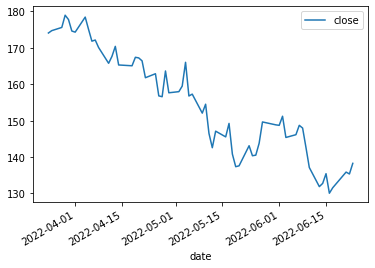

In [15]:
apple_df[['close']].plot()

<AxesSubplot:xlabel='date'>

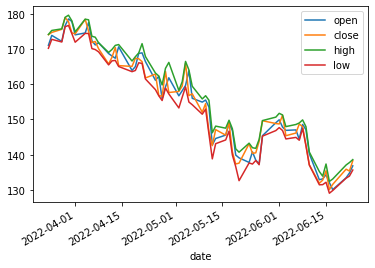

In [16]:
apple_df[['open', 'close', 'high', 'low']].plot()

<AxesSubplot:xlabel='date'>

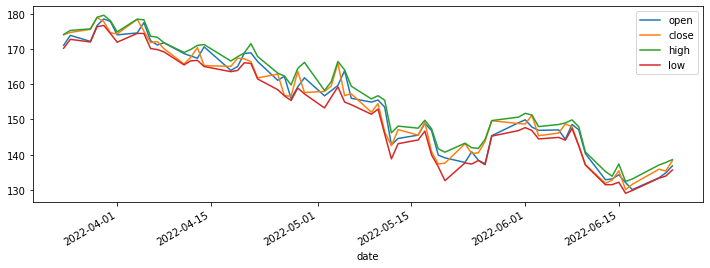

In [17]:
apple_df[['open', 'close', 'high', 'low']].plot(figsize=(12,4))

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/matheus/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/matheus/code/matheussposito/data-challenges-869/02-Data-Toolkit/02-Data-Sourcing/01-Stock-Market-API
plugins: anyio-3.4.0
collecting ... collected 3 items

tests/test_apple.py::TestApple::test_apple_df_columns PASSED             [ 33%]
tests/test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED  [ 66%]
tests/test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED  [100%]

============================== 3 passed in 0.45s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master


In [20]:
codes = ['amzn', 'googl', 'fb']
data = []
for code in codes:
    url = f"https://iex.lewagon.com/stable/stock/{code}/chart/3m"
    api_data = requests.get(url).json()
    data.append(api_data)
len(data)

3

In [21]:
amzn_df = pd.DataFrame(data[0])
googl_df = pd.DataFrame(data[1])
fb_df = pd.DataFrame(data[2])

In [34]:
amzn_df['date'] = pd.to_datetime(amzn_df['date'])
googl_df['date'] = pd.to_datetime(googl_df['date'])
fb_df['date'] = pd.to_datetime(fb_df['date'])

In [37]:
amzn_df.set_index('date', inplace=True)
googl_df.set_index('date', inplace=True)
fb_df.set_index('date', inplace=True)

In [38]:
stocks_df = pd.concat([apple_df,amzn_df,googl_df,fb_df])

In [39]:
stocks_df.tail()

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2022-06-02,198.86,200.935,187.73,188.45,FB,31951582.0,HISTORICAL_PRICES,FB,,1.654218e+12,...,187.73,31951582,188.45,198.86,200.935,187.73,31951582.0,"Jun 2, 22",10.22,0.0542
2022-06-03,190.78,196.610,189.78,195.98,FB,19464993.0,HISTORICAL_PRICES,FB,,1.654306e+12,...,189.78,19464993,195.98,190.78,196.610,189.78,19464993.0,"Jun 3, 22",-8.08,-0.0406
2022-06-06,194.25,196.920,188.40,193.99,FB,30574242.0,HISTORICAL_PRICES,FB,,1.654564e+12,...,188.40,30574242,193.99,194.25,196.920,188.40,30574242.0,"Jun 6, 22",3.47,0.0182
2022-06-07,195.65,196.530,191.49,191.93,FB,18828687.0,HISTORICAL_PRICES,FB,,1.654650e+12,...,191.49,18828687,191.93,195.65,196.530,191.49,18828687.0,"Jun 7, 22",1.40,0.0072
2022-06-08,196.64,202.030,194.41,194.67,FB,22267154.0,HISTORICAL_PRICES,FB,,1.654736e+12,...,194.41,22267154,194.67,196.64,202.030,194.41,22267154.0,"Jun 8, 22",0.99,0.0051


In [41]:
close_stocks_df = stocks_df[['close', 'key']]
close_stocks_df

,close,key
date,,
2022-03-24,174.07,AAPL
2022-03-25,174.72,AAPL
2022-03-28,175.60,AAPL
2022-03-29,178.96,AAPL
2022-03-30,177.77,AAPL
...,...,...
2022-06-02,198.86,FB
2022-06-03,190.78,FB
2022-06-06,194.25,FB


In [42]:
close_stocks_df.key.unique()

array(['AAPL', 'AMZN', 'GOOGL', 'FB'], dtype=object)

In [43]:
pivot_df = close_stocks_df.pivot(columns='key', values='close')

In [44]:
pivot_df

key,AAPL,AMZN,FB,GOOGL
date,,,,
2022-03-24,174.07,163.6495,219.57,2831.44
2022-03-25,174.72,164.7735,221.82,2833.46
2022-03-28,175.60,168.9905,223.59,2829.11
2022-03-29,178.96,169.3150,229.86,2850.11
2022-03-30,177.77,166.3010,227.85,2838.77
...,...,...,...,...
2022-06-16,130.06,103.6600,NaN,2120.67
2022-06-17,131.56,106.0900,NaN,2142.87
2022-06-21,135.87,108.6800,NaN,2230.88


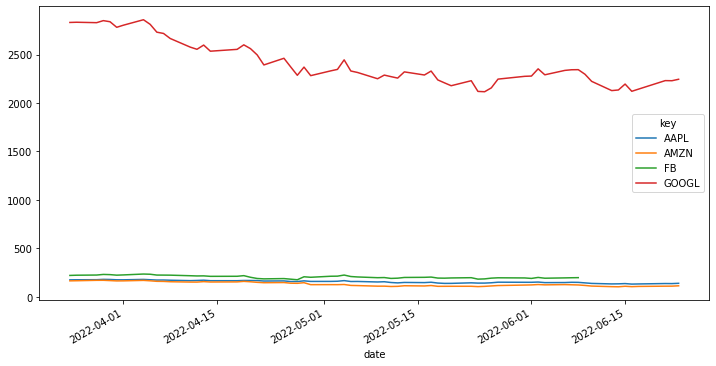

In [47]:
pivot_df.plot(kind='line', figsize=(12,6));

In [48]:
normalized_df = pivot_df.copy()

In [49]:
normalized_df['AAPL'][0]

174.07

In [50]:
normalized_df['AAPL'] = normalized_df['AAPL'] / normalized_df['AAPL'][0]
normalized_df['AMZN'] = normalized_df['AMZN'] / normalized_df['AMZN'][0]
normalized_df['FB'] = normalized_df['FB'] / normalized_df['FB'][0]
normalized_df['GOOGL'] = normalized_df['GOOGL'] / normalized_df['GOOGL'][0]

In [51]:
normalized_df

key,AAPL,AMZN,FB,GOOGL
date,,,,
2022-03-24,1.000000,1.000000,1.000000,1.000000
2022-03-25,1.003734,1.006868,1.010247,1.000713
2022-03-28,1.008790,1.032637,1.018309,0.999177
2022-03-29,1.028092,1.034620,1.046864,1.006594
2022-03-30,1.021256,1.016202,1.037710,1.002589
...,...,...,...,...
2022-06-16,0.747171,0.633427,NaN,0.748972
2022-06-17,0.755788,0.648276,NaN,0.756813
2022-06-21,0.780548,0.664102,NaN,0.787896


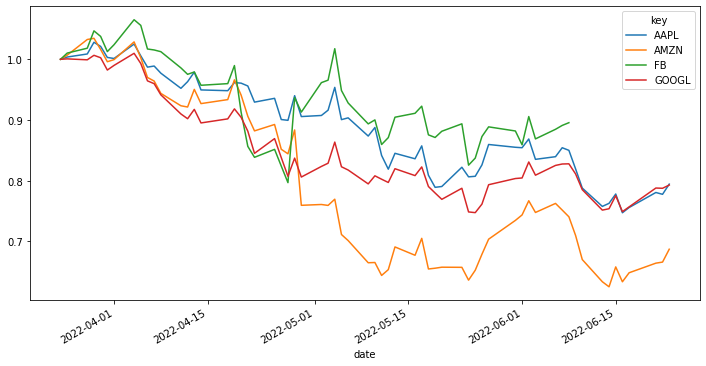

In [52]:
normalized_df.plot(kind='line', figsize=(12,6));